In [47]:
#dependencies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
#loading data
df = pd.read_csv('kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [49]:
#missing value checking
df.isnull().values.any()

True

In [50]:
#number of row and column
df.shape

(400, 26)

In [51]:
#target column having healthy(0) and unhealthy(1)
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [52]:
#My own calculations
#percent_dont_have_disease = 48/(147+48)*100
#percent_has_disease = 147/(147+48)*100
#print('Guess for not having Parkinsons disease, I would be correct',percent_dont_have_disease,'% of the time.')
#print('Guess for having Parkinsons disease, I would be correct',percent_has_disease,'% of the time.')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='classification', ylabel='count'>

C:\Users\User\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


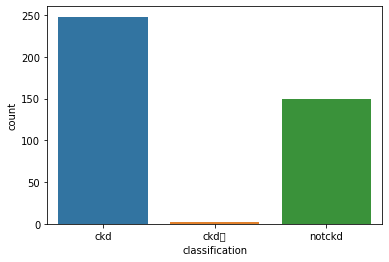

In [53]:
#visualize the count
sns.countplot(df['classification'])

In [54]:
#know the datatypes
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [55]:
#create the feature dataset
x = df.drop(['id','age','rbc','pc','pcc','ba','bgr','sod','pot','wc','rc','htn','pcv','dm','cad','appet','pe','ane'],1)
x = np.array(x.drop(['classification'],1))
#create the target dataset
y = np.array(df['classification'])

In [56]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [57]:
#transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range = (0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
#XGBoosting classifier
model = XGBClassifier().fit(x_train, y_train)

In [59]:
#model predictions
predictions = model.predict(x_test)
predictions

array(['notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd'],
      dtype=object)

In [60]:
y_test

array(['notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd\t', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd'],
      dtype=object)

In [61]:
#models accuracy, precision, recall, F1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        51
        ckd	       0.00      0.00      0.00         1
      notckd       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
